# Unsupervised Learning Project

# Data Description:

The data contains features extracted from the silhouette of vehicles in different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus,
Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars
would be readily distinguishable, but it would be more difficult to distinguish between
the cars.

# Domain:

Object recognition

# Context:

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of
features extracted from the silhouette. The vehicle may be viewed from one of many
different angles.

# Attribute Information:

 All the features are geometric features extracted from the silhouette.
 All are numeric in nature.

# Learning Outcomes:

 Exploratory Data Analysis
 Reduce number dimensions in the dataset with minimal information loss
 Train a model using Principle Components

# Objective:

Apply dimensionality reduction technique – PCA and train a model using principle
components instead of training the model using just the raw data.

# Steps and tasks:

1. Data pre-processing – Perform all the necessary preprocessing on the data ready
to be fed to an Unsupervised algorithm (10 marks)
2. Understanding the attributes - Find relationship between different attributes
(Independent variables) and choose carefully which all attributes have to be a part
of the analysis and why (10 points)
3. Split the data into train and test (Suggestion: specify “random state” if you are
using train_test_split from Sklearn) (5 marks)
4. Train a Support vector machine using the train set and get the accuracy on the test
set (10 marks)
5. Perform K-fold cross validation and get the cross validation score of the model
(10 marks)
6. Use PCA from Scikit learn, extract Principal Components that capture about 95%
of the variance in the data – (10 points)
7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the
original data. And the accuracy score should be on the same rows of test data that
were used earlier. (hint: set the same random state) (10 marks)
8. Compare the accuracy scores and cross validation scores of Support vector
machines – one trained using raw data and the other using Principal Components,
and mention your findings (5 points)

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
df= pd.read_csv("vehicle-1.csv")
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


# 1.Data pre-processing 

In [3]:
df.shape

(846, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

In [6]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. from above we can say that we have NAN or 0 in the  column. We could drop those rows - which might not be a good idea under all situations. Here, we will replace them with their median values.


In [7]:
df['skewness_about'].unique()

array([ 6.,  9., 14.,  5., 13.,  3.,  2.,  4.,  8.,  0.,  7.,  1., 10.,
       17., 20., 18., nan, 11., 16., 21., 12., 22., 15., 19.])

In [8]:
df = df.replace('0', np.nan)

In [9]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively
df=df.fillna(df.median())

In [10]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Observations:
Compactness and circularity has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier
scatter_ratio feature seems to be having some kind of skewness and outlier


In [12]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [13]:
# Label Encoding
le=preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class'])
print(df.shape)
df.head()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


# 2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions

In [14]:
# Check for correlation of variable
df.corr(method='pearson')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.689743,0.091534,0.148249,0.812620,-0.788750,0.813694,0.676143,0.762070,0.814012,0.585243,-0.249593,0.236078,0.157015,0.298537,0.365552,-0.033796
circularity,0.684887,1.000000,0.792320,0.620912,0.153778,0.251467,0.847938,-0.821472,0.843400,0.961318,0.796306,0.835946,0.925816,0.051946,0.144198,-0.011439,-0.104426,0.046351,-0.158910
distance_circularity,0.789928,0.792320,1.000000,0.767035,0.158456,0.264686,0.905076,-0.911307,0.893025,0.774527,0.861519,0.886017,0.705771,-0.225944,0.113924,0.265547,0.146098,0.332732,-0.064467
radius_ratio,0.689743,0.620912,0.767035,1.000000,0.663447,0.450052,0.734429,-0.789481,0.708385,0.568949,0.793415,0.718436,0.536372,-0.180397,0.048713,0.173741,0.382214,0.471309,-0.182186
pr.axis_aspect_ratio,0.091534,0.153778,0.158456,0.663447,1.000000,0.648724,0.103732,-0.183035,0.079604,0.126909,0.272910,0.089189,0.121971,0.152950,-0.058371,-0.031976,0.239886,0.267725,-0.098178
max.length_aspect_ratio,0.148249,0.251467,0.264686,0.450052,0.648724,1.000000,0.166191,-0.180140,0.161502,0.305943,0.318957,0.143253,0.189743,0.295735,0.015599,0.043422,-0.026081,0.143919,0.207619
scatter_ratio,0.812620,0.847938,0.905076,0.734429,0.103732,0.166191,1.000000,-0.971601,0.989751,0.809083,0.948662,0.993012,0.799875,-0.027542,0.074458,0.212428,0.005628,0.118817,-0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.789481,-0.183035,-0.180140,-0.971601,1.000000,-0.948996,-0.775854,-0.936382,-0.953816,-0.766314,0.103302,-0.052600,-0.185053,-0.115126,-0.216905,0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.708385,0.079604,0.161502,0.989751,-0.948996,1.000000,0.810934,0.934227,0.988213,0.796690,-0.015495,0.083767,0.214700,-0.018649,0.099286,-0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.568949,0.126909,0.305943,0.809083,-0.775854,0.810934,1.000000,0.744985,0.794615,0.866450,0.041622,0.135852,0.001366,-0.103948,0.076770,-0.032399


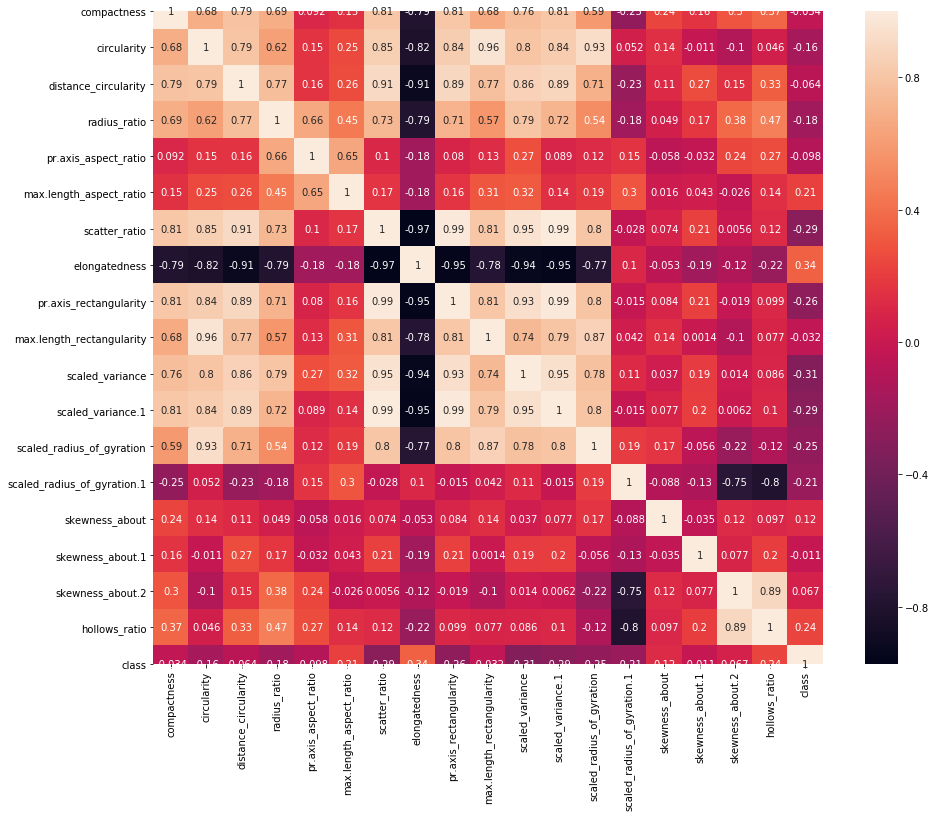

In [15]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)#correlation function

# Observations:
    1.'circularity' is highly correlated with 'max.length_rectangularity' and 'scaled_radius_of_gyration'(0.96 & 0.93)
    2.'scatter_ratio' shows high significance with 'pr.axis_rectangularity' ,'max.length_rectangularity', 'scaled_variance','scaled_variance.1','scaled_radius_of_gyration' and 'distance_circulation'
    3.'pr.axis_rectangularity' is positively correlated with 'scaled_variance','scaled_variance.1' and 'scaled_radius_of_gyration'
    4.'scaled_variance' and 'scaled_variance.1' is also positively correlated

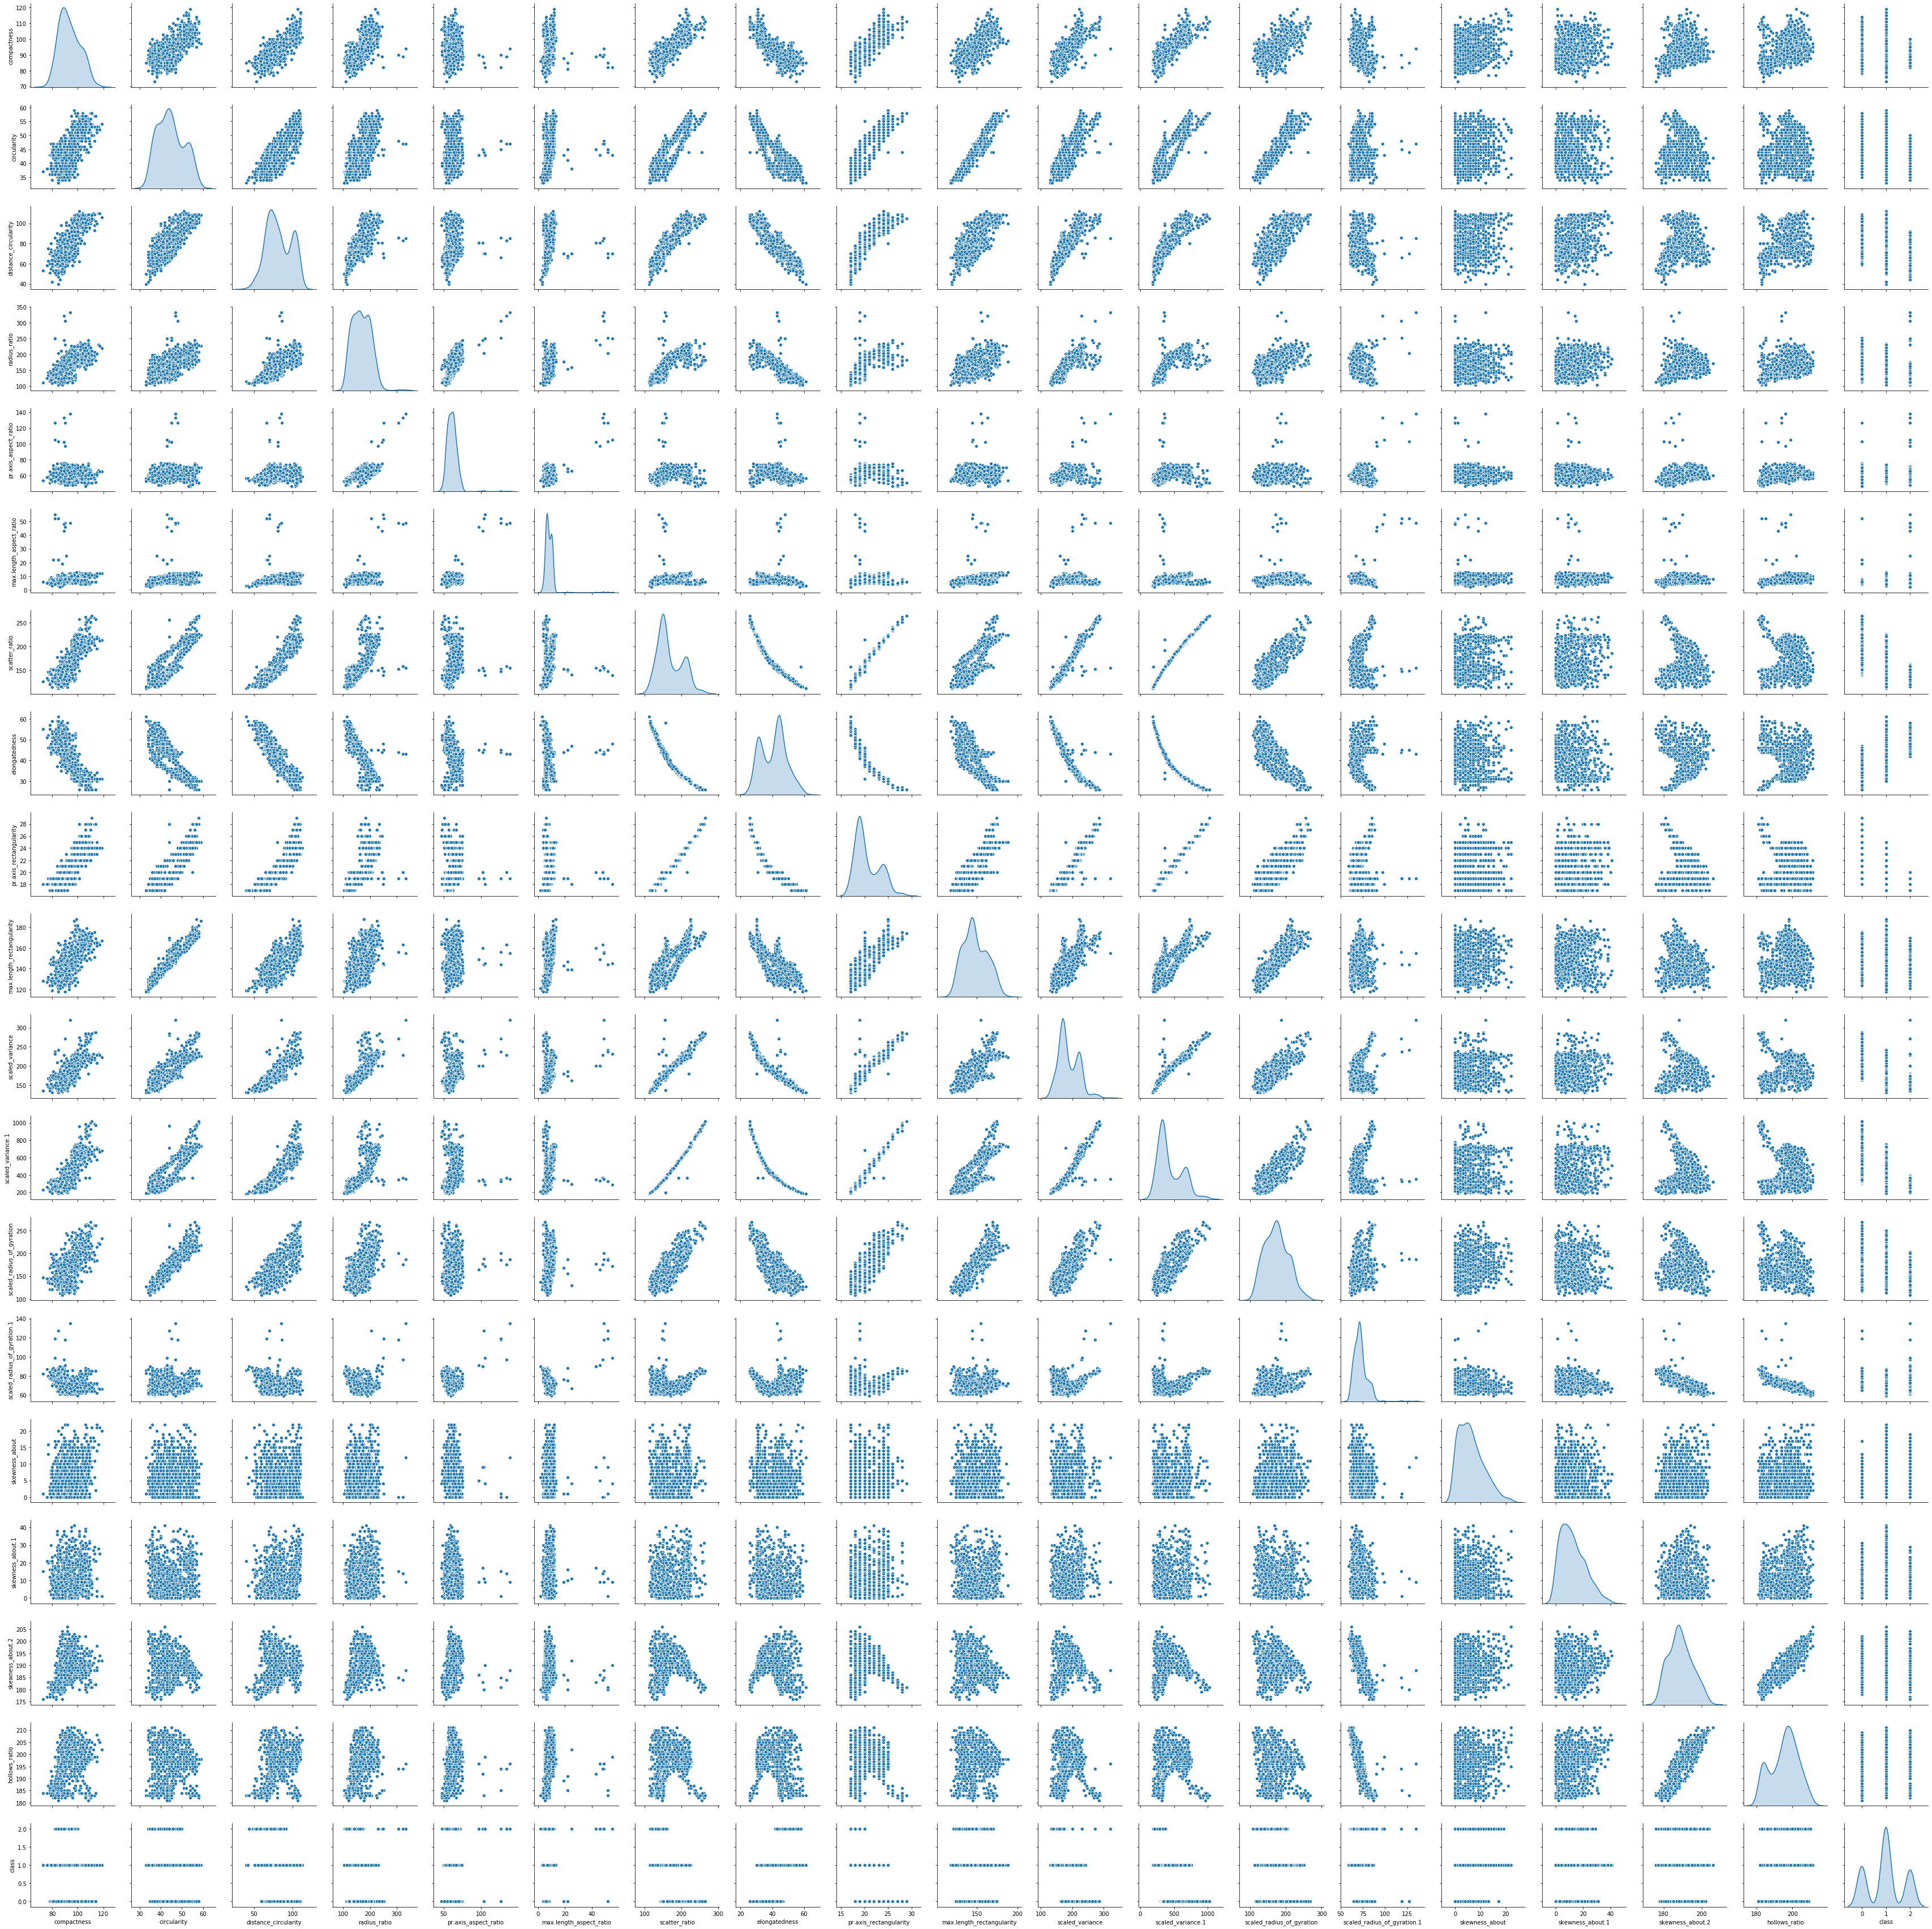

In [16]:
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

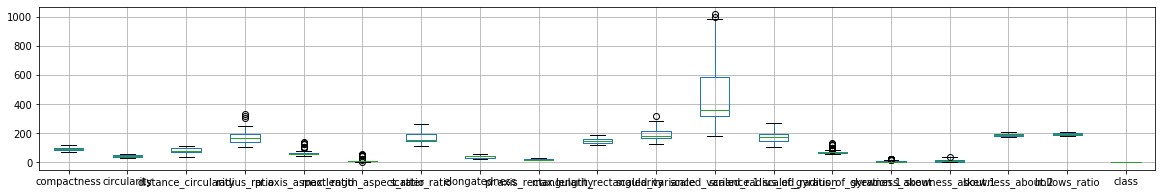

In [17]:
# Remove anyoutliers, standardize variables in pre-processing step
df.boxplot(figsize=(20,3))

In [18]:
# We could see few outliers here. Possible mode of imputation:

{'whiskers': [<matplotlib.lines.Line2D at 0xf52ff222c8>,
 'caps': [<matplotlib.lines.Line2D at 0xf52ff22bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xf52ff208c8>],
 'medians': [<matplotlib.lines.Line2D at 0xf52ff24c08>],
 'fliers': [<matplotlib.lines.Line2D at 0xf52ff25bc8>],
 'means': []}

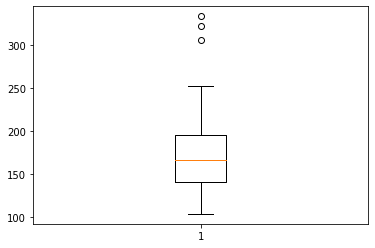

In [19]:
plt.boxplot(df['radius_ratio'])

In [20]:
z=np.abs(stats.zscore(df))
print(z)

[[0.16058035 0.51807313 0.05717723 ... 0.31201194 0.18395733 1.45708611]
 [0.32546965 0.62373151 0.12074088 ... 0.01326483 0.45297703 1.45708611]
 [1.25419283 0.84430302 1.51914112 ... 0.14937355 0.04944748 0.03200536]
 ...
 [1.49721783 1.49676282 1.20132288 ... 0.31201194 0.72199673 0.03200536]
 [0.93303214 1.43930625 0.26064101 ... 0.17590322 0.08506238 0.03200536]
 [1.05454464 1.43930625 1.02340478 ... 0.47465032 0.75761164 1.45708611]]


In [21]:
threshold=3
print(np.where(z>3))

(array([  4,   4,   4,  37,  37,  37,  37,  44,  85, 100, 100, 100, 123,
       132, 135, 135, 135, 135, 291, 291, 321, 321, 388, 388, 388, 388,
       388, 391, 396, 513, 516, 523, 523, 623, 687, 687, 706, 706, 706,
       733, 761, 835, 835, 835], dtype=int64), array([ 4,  5, 13,  3,  4,  5, 13,  0, 11,  4,  5, 13, 14, 15,  3,  4,  5,
       13,  4,  5, 10, 11,  3,  4,  5, 10, 13,  5, 10, 15, 14,  4,  5, 14,
       10, 11,  4,  5, 13, 10, 14,  8, 10, 11], dtype=int64))


In [22]:
print(z[4][4]) #z score higher than 3

5.245642630921364


In [23]:
df=df[(z<3).all(axis=1)]

In [24]:
df.shape #new shape

(824, 19)

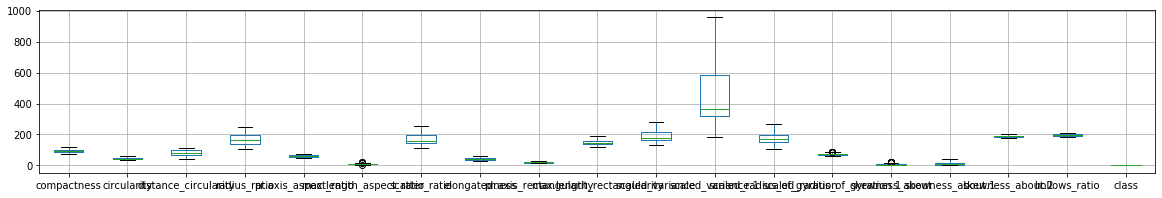

In [25]:
df.boxplot(figsize=(20,3))

In [26]:
# We could see most of the outliers are now removed.

{'whiskers': [<matplotlib.lines.Line2D at 0xf5300e0f08>,
 'caps': [<matplotlib.lines.Line2D at 0xf5300e4ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0xf5300e0548>],
 'medians': [<matplotlib.lines.Line2D at 0xf5300eaf88>],
 'fliers': [<matplotlib.lines.Line2D at 0xf5300eaec8>],
 'means': []}

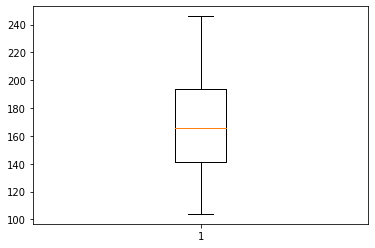

In [27]:
plt.boxplot(df['radius_ratio'])

# 3.Split the data into train and test 

In [28]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [29]:
#now separate the dataframe into dependent and independent variables
#print("shape of new_vehicle_df_independent_attr::",X.shape)
#print("shape of new_vehicle_df_dependent_attr::",y.shape)

X = df.iloc[:,0:18].values
y = df.iloc[:,18].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=10)

# 4.Train a Support vector machine using the train set and get the accuracy on the test set 

In [30]:
from sklearn import svm
clr = svm.SVC(gamma='scale')  
clr.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_predict = clr.predict(X_test)

In [32]:
# Calculation of accuracy

In [33]:
print("Accuracy on training set: {:.4f}".format(clr.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(clr.score(X_test, y_test)))

Accuracy on training set: 0.6840
Accuracy on test set: 0.6613


In [34]:
model_score = clr.score(X_test, y_test)
print(model_score)

0.6612903225806451


In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['svm(raw data)'], 'accuracy': model_score})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,svm(raw data),0.66129


# 5.Perform K-fold cross validation and get the cross validation score of the model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=10)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94117647 0.88235294 0.94117647 0.88235294 0.94117647 1.
 0.94117647 0.94117647 0.94117647 0.88235294 1.         0.94117647
 1.         0.94117647 1.         0.94117647 0.88235294 1.
 1.         0.88235294 0.94117647 1.         1.         0.94117647
 0.9375     0.9375     0.8125     0.9375     1.         1.
 0.9375     1.         1.         1.         0.9375     0.9375
 1.         1.         0.875      1.         0.9375     1.
 1.         0.9375     1.         1.         0.875      1.
 1.         1.        ]
Accuracy: 95.654% (4.701%)


In [37]:
kfmodel_score = results.mean()
print(kfmodel_score)

0.9565441176470588


In [38]:
tempResultsDf = pd.DataFrame({'Method':['K-fold cross val(raw data)'], 'accuracy':kfmodel_score })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,svm(raw data),0.661290
0,K-fold cross val(raw data),0.956544


# 6.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 

In [39]:
# Drop class variables
df_new =df.drop(['class'], axis =1)

df_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183


In [40]:
# Scaling The Independent Data Set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled =  sc.fit_transform(df_new)  

In [41]:
df_scaled

array([[ 0.17951215,  0.53294153,  0.06812329, ...,  0.39524814,
        -0.31968164,  0.18069854],
       [-0.31519692, -0.61579044,  0.13191146, ...,  0.16829032,
         0.00673431,  0.45240582],
       [ 1.29260756,  0.86115067,  1.53525126, ..., -0.39910421,
        -0.15647366,  0.04484489],
       ...,
       [ 1.5399621 ,  1.51756894,  1.2163104 , ..., -0.96649875,
        -0.31968164,  0.72411311],
       [-0.93358326, -1.43631328, -0.25081757, ...,  1.4165583 ,
         0.16994228, -0.09100875],
       [-1.05726053, -1.43631328, -1.01627564, ...,  0.62220595,
        -0.48288961, -0.77027697]])

In [42]:
covMatrix = np.cov(df_scaled,rowvar=False)
print(covMatrix)

[[ 1.00121507  0.68217024  0.78822181  0.75243342  0.21698852  0.46386185
   0.80932301 -0.78575974  0.81064247  0.67398599  0.78796074  0.81175375
   0.57474275 -0.29127966  0.22075084  0.15984485  0.31959319  0.39657645]
 [ 0.68217024  1.00121507  0.79171052  0.64957366  0.22025961  0.541045
   0.85047918 -0.82123179  0.84735643  0.96444884  0.81157051  0.84016678
   0.92992793  0.02955186  0.14430926 -0.01286449 -0.09028883  0.06969066]
 [ 0.78822181  0.79171052  1.00121507  0.81531437  0.26136013  0.6282153
   0.90869196 -0.91114978  0.89779661  0.77220204  0.88892309  0.89205304
   0.70207339 -0.28197451  0.10625657  0.26914753  0.1611285   0.35768519]
 [ 0.75243342  0.64957366  0.81531437  1.00121507  0.67238671  0.44497519
   0.80028668 -0.85032469  0.7751962   0.58586652  0.80720638  0.78893446
   0.55961996 -0.42786646  0.05149701  0.18807334  0.43547261  0.52425001]
 [ 0.21698852  0.22025961  0.26136013  0.67238671  1.00121507  0.1651475
   0.2245388  -0.3213513   0.19504616 

In [43]:
covMatrix.shape

(18, 18)

In [44]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.71309795e-01 -8.73254992e-02  4.12525682e-02  1.45446164e-01
   1.62106687e-01  2.18441148e-01 -2.49159797e-01 -7.57790783e-01
   3.46444453e-01  1.75790006e-01 -6.12349381e-02 -6.64587067e-03
  -1.12656376e-02 -1.14250379e-01 -1.28888167e-01 -1.06071706e-02
  -2.70493083e-02 -1.51701066e-02]
 [-2.84449778e-01  1.45592977e-01  2.01746727e-01 -2.84005677e-02
  -1.31358918e-01 -2.66296378e-02  3.88607045e-01 -8.70916948e-02
   5.00964323e-02 -1.57155989e-01  4.70879351e-02  1.86957975e-01
  -8.59039936e-03 -1.23985195e-01  2.47106065e-01  1.07325660e-01
  -6.65801402e-01 -2.90037795e-01]
 [-3.00909965e-01 -3.81921704e-02 -7.54331346e-02  1.04297062e-01
  -7.85065596e-02  2.07109277e-03 -1.08832809e-01  3.09000450e-01
   3.40704654e-01 -8.26282981e-02 -7.63669679e-01 -4.13861513e-02
   9.15491318e-03  2.30023580e-01  2.56939245e-02 -2.54978086e-02
  -9.13228637e-02  8.64694079e-02]
 [-2.75770685e-01 -1.94070827e-01 -4.15565569e-02 -2.40023782e-01
   1.26097997e-01 -

In [45]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals) #3.Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Eigen Vectors 
%s [[-2.71309795e-01 -8.73254992e-02  4.12525682e-02  1.45446164e-01
   1.62106687e-01  2.18441148e-01 -2.49159797e-01 -7.57790783e-01
   3.46444453e-01  1.75790006e-01 -6.12349381e-02 -6.64587067e-03
  -1.12656376e-02 -1.14250379e-01 -1.28888167e-01 -1.06071706e-02
  -2.70493083e-02 -1.51701066e-02]
 [-2.84449778e-01  1.45592977e-01  2.01746727e-01 -2.84005677e-02
  -1.31358918e-01 -2.66296378e-02  3.88607045e-01 -8.70916948e-02
   5.00964323e-02 -1.57155989e-01  4.70879351e-02  1.86957975e-01
  -8.59039936e-03 -1.23985195e-01  2.47106065e-01  1.07325660e-01
  -6.65801402e-01 -2.90037795e-01]
 [-3.00909965e-01 -3.81921704e-02 -7.54331346e-02  1.04297062e-01
  -7.85065596e-02  2.07109277e-03 -1.08832809e-01  3.09000450e-01
   3.40704654e-01 -8.26282981e-02 -7.63669679e-01 -4.13861513e-02
   9.15491318e-03  2.30023580e-01  2.56939245e-02 -2.54978086e-02
  -9.13228637e-02  8.64694079e-02]
 [-2.75770685e-01 -1.94070827e-01 -4.15565569e-02 -2.40023782e-01
   1.26097997e-01 -

In [46]:
 # Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.846665404618847, array([-0.27130979, -0.28444978, -0.30090997, -0.27577068, -0.10742544,
       -0.18759366, -0.3093001 ,  0.30762514, -0.30619055, -0.27458192,
       -0.30225868, -0.30604717, -0.25881899,  0.06121698, -0.03853509,
       -0.05969386, -0.04855315, -0.09766307])), (3.299807102376317, array([-0.0873255 ,  0.14559298, -0.03819217, -0.19407083, -0.24837842,
       -0.06898387,  0.07775906, -0.01888279,  0.08956041,  0.13602678,
        0.07276993,  0.0818148 ,  0.21860505,  0.50256696, -0.02768412,
       -0.0958106 , -0.50680827, -0.50351292])), (1.2035199065401396, array([ 0.04125257,  0.20174673, -0.07543313, -0.04155656,  0.09599067,
        0.11339008, -0.10934348,  0.0914628 , -0.10698675,  0.20602485,
       -0.13892106, -0.10895807,  0.21410656, -0.06806131,  0.54880158,
       -0.68130793,  0.07284913,  0.03972992])), (1.127942516794535, array([ 0.14544616, -0.02840057,  0.10429706, -0.24002378, -0.6062864 ,
        0.24720738,  0.0007455 ,  0.07045636,  0.02

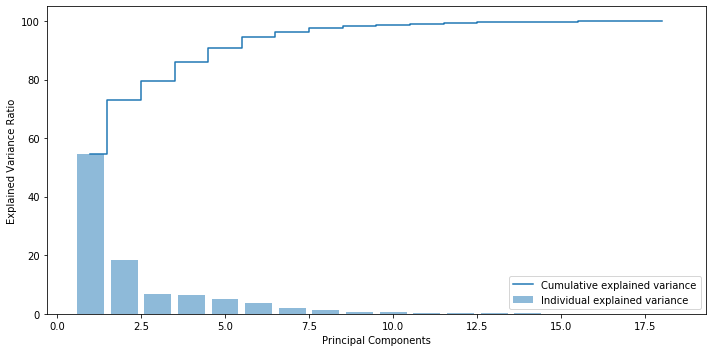

In [47]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Observations:
    From above we plot we can clealry observer that 8 dimension are able to explain 95 %variance of data.so we will use first 8 principal components going forward and calulate the reduced dimensions

In [48]:
pca = PCA(n_components=8)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
df_pca=pca.transform(df_scaled)

In [50]:
pca.components_

array([[-2.71309795e-01, -2.84449778e-01, -3.00909965e-01,
        -2.75770685e-01, -1.07425438e-01, -1.87593661e-01,
        -3.09300104e-01,  3.07625144e-01, -3.06190548e-01,
        -2.74581919e-01, -3.02258684e-01, -3.06047174e-01,
        -2.58818994e-01,  6.12169850e-02, -3.85350884e-02,
        -5.96938582e-02, -4.85531491e-02, -9.76630686e-02],
       [-8.73254992e-02,  1.45592977e-01, -3.81921704e-02,
        -1.94070827e-01, -2.48378425e-01, -6.89838664e-02,
         7.77590595e-02, -1.88827871e-02,  8.95604107e-02,
         1.36026776e-01,  7.27699345e-02,  8.18148047e-02,
         2.18605050e-01,  5.02566961e-01, -2.76841188e-02,
        -9.58106036e-02, -5.06808273e-01, -5.03512924e-01],
       [-4.12525682e-02, -2.01746727e-01,  7.54331346e-02,
         4.15565569e-02, -9.59906665e-02, -1.13390083e-01,
         1.09343480e-01, -9.14627983e-02,  1.06986751e-01,
        -2.06024846e-01,  1.38921058e-01,  1.08958069e-01,
        -2.14106558e-01,  6.80613078e-02, -5.48801579e

In [51]:
df_scaled.shape

(824, 18)

In [52]:
df_pca.shape

(824, 8)

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) 

In [53]:
# Fitting SVM ON PCA Data
# Split the data into train and test

X1_train, X1_test, y1_train, y1_test = train_test_split(df_pca,y,test_size=0.30, random_state=10)

In [54]:
clr1 = svm.SVC(gamma='scale')  
clr1.fit(X1_train , y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
x_pca_predict = clr1.predict(X1_test)

In [56]:
print("Accuracy on training set: {:.4f}".format(clr1.score(X1_train, y1_train)))
print("Accuracy on test set: {:.4f}".format(clr1.score(X1_test, y1_test)))

Accuracy on training set: 0.9722
Accuracy on test set: 0.9153


In [57]:
model_score1 = clr1.score(X1_test, y1_test)
print(model_score1)

0.9153225806451613


In [58]:
tempResultsDf = pd.DataFrame({'Method':['svm(pca data)'], 'accuracy': [model_score1]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,svm(raw data),0.661290
0,K-fold cross val(raw data),0.956544
0,svm(pca data),0.915323


In [59]:
# K-fold cross validation on PCA data
num_folds = 50
seed = 7

kfold1 = KFold(n_splits=num_folds, random_state=seed)
model1 = LogisticRegression()
results = cross_val_score(model1, df_pca, y, cv=kfold1)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.82352941 0.76470588 0.88235294 0.82352941 0.70588235 0.94117647
 0.76470588 0.88235294 0.82352941 0.82352941 0.82352941 1.
 0.88235294 0.82352941 0.88235294 0.82352941 0.70588235 0.88235294
 0.88235294 0.70588235 0.88235294 0.76470588 0.82352941 0.88235294
 0.8125     0.875      0.875      0.8125     0.875      0.8125
 0.875      0.8125     0.875      0.875      0.8125     0.8125
 0.75       0.8125     0.8125     0.9375     0.8125     0.9375
 1.         0.625      0.9375     0.75       0.875      0.8125
 0.9375     0.875     ]
Accuracy: 84.000% (7.304%)


In [60]:
kfmodel_score1 = results.mean()
print(kfmodel_score1)

0.84


# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

In [61]:
tempResultsDf = pd.DataFrame({'Method':['K-fold cross val(pca data)'], 'accuracy':kfmodel_score1})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,svm(raw data),0.661290
0,K-fold cross val(raw data),0.956544
0,svm(pca data),0.915323
0,K-fold cross val(pca data),0.840000


Observations:
1. On testing data set we saw that our support vector classifier without performing PCA has an accuracy score of 66 %
But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 91 %.
2. When we appliy k.fold crss validation on raw data we get 95% accuracy.
3..Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score. 
4.By reducing dimension to 8 we get accuracy 84% with std (7.3%)
